In [87]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.linear_model import LinearRegression
import pandas as pd
import csv
import datetime

In [89]:
date = []
temp = []

with open('../../data/data.csv') as data_file:
    csv_reader = csv.reader(data_file, delimiter=',')
    for row in csv_reader:
        date.append(row[0])
        temp.append(float(row[1]))

data_points_count = 12 * 50
x = np.array(list(range(0, data_points_count))).reshape((-1, 1));
y = np.array(temp[-1 * data_points_count:]);

formatted_dates = [datetime.datetime.strptime(d, '%Y%m') for d in date[-1 * data_points_count:]]


AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

intercept: -0.010414198557958887
slope: [0.00151563]
0.7982243409547739


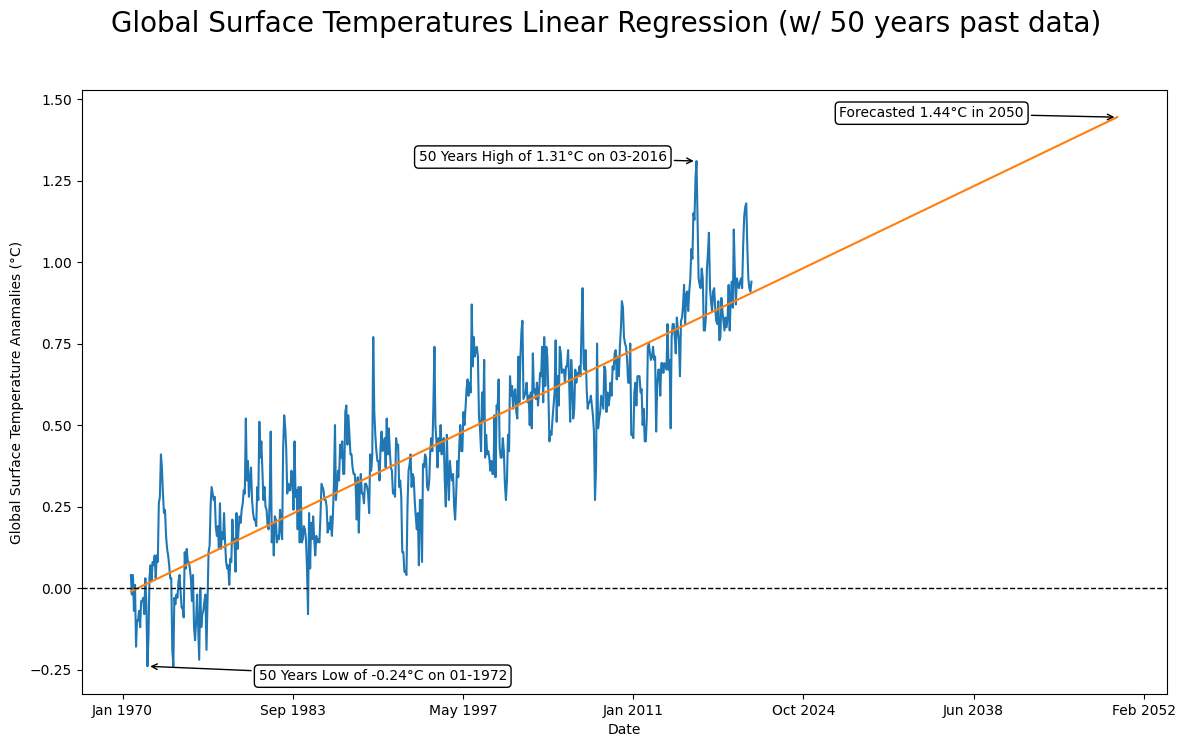

In [86]:
model = LinearRegression();
model.fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

r_sq = model.score(x, y)
print(r_sq)

x_dates = matplotlib.dates.date2num(formatted_dates)
formatted_x_dates = matplotlib.dates.DateFormatter('%b %Y')
fig = plt.figure(figsize=(14, 8), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle(f'Global Surface Temperatures Linear Regression (w/ {int(data_points_count/12)} years past data)', fontsize=20)
subPlot = fig.add_subplot(1,1,1)
subPlot.xaxis.set_major_formatter(formatted_x_dates)
subPlot.plot(x_dates, y)
subPlot.set_xlabel('Date')
subPlot.set_ylabel('Global Surface Temperature Anamalies (°C)')

fifty_year_low_index = np.argmin(y)
fifty_year_high_index = np.argmax(y)

x2 = matplotlib.dates.date2num(datetime.datetime.strptime('01-2050', '%m-%Y'))
y2 = model.coef_ * (data_points_count + 30 * 12) + model.intercept_
subPlot.plot([x_dates[0], x2], [model.intercept_, y2])
# subPlot.plot([x_dates[0], x_dates[-1]], [model.intercept_, model.coef_ * (data_points_count) + model.intercept_])
subPlot.annotate(f'Forecasted {round(y2[-1],2)}°C in 2050', xy=(x2,y2), xytext=(-200,0), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
subPlot.axhline(0, color='black', lw=1, linestyle='--')
subPlot.annotate(f'50 Years High of {y[fifty_year_high_index]}°C on {formatted_dates[fifty_year_high_index].strftime("%m-%Y")}', xy=(x_dates[fifty_year_high_index],y[fifty_year_high_index]), xytext=(-200, 0), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
subPlot.annotate(f'50 Years Low of {y[fifty_year_low_index]}°C on {formatted_dates[fifty_year_low_index].strftime("%m-%Y")}', xy=(x_dates[fifty_year_low_index],y[fifty_year_low_index]), xytext=(80, -10), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
plt.show()

In [88]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
import math

date_parser = lambda d: datetime.strptime(d, '%Y%m')
index_data_df = pd.read_csv(
    '../../data/data.csv',
    names=['date', 'temp'],
    dtype={'date': 'str', 'temp': 'float'},
    parse_dates=['date'],
    date_parser=date_parser,
    index_col='date'
)

In [91]:
decompose_res = seasonal_decompose(index_data_df, model='additive', freq=12)
print(decompose_res.trend.to_numpy())

print(data_df.to_numpy())
# x = [d for i, d in enumerate(dates) if math.isnan(decompose_res.trend[i])]

# y = decompose_res.trend
# linear_model = LinearRegression()
# linear_model.fit(x, y)


[nan nan nan ... nan nan nan]
[[-0.06]
 [-0.15]
 [-0.1 ]
 ...
 [ 0.92]
 [ 0.91]
 [ 0.94]]
